# Revisão

> 

# Teste de Hipótese

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm

sns.set()

Testes estatísticos são regras de decisão que permitem avaliar a razoabilidade das hipóteses feitas sobre os parâmetros populacionais e aceitá-las ou rejeitá-las como provavelmente verdadeiras ou falsas tendo como base uma amostra.

# Teste de Normalidade - Exemplo

### Importando bibliotecas
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

In [2]:
from scipy.stats import normaltest

A função `normaltest` testa a hipótese nula $H_0$ de que a amostra é proveniente de uma distribuição normal.

### Definindo a significância do teste ($\alpha$)

In [2]:
significancia = 0.05 # alpha
confianca = 1 - significancia

### Critério do valor $p$

> **Rejeitar $H_0$ se o valor $p\leq 0,05$**

### Carregando nosso dataset

In [3]:
df = pd.read_csv('../datasets/pnad_2015.csv')
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


## Testando a variável Renda

<AxesSubplot:xlabel='Renda', ylabel='Count'>

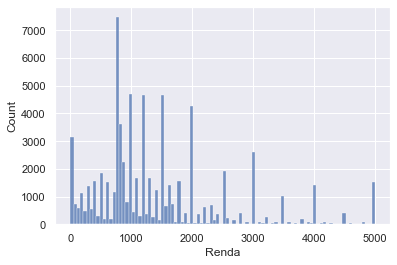

In [6]:
# histograma
condicao = df['Renda'] <= 5000

renda5000 = df[condicao]

sns.histplot(renda5000['Renda'])

### Realizando o teste

In [8]:
# aplicando o normaltest
from scipy.stats import normaltest

normaltest(renda5000['Renda'])

NormaltestResult(statistic=16256.311276902332, pvalue=0.0)

In [9]:
test, p_value = normaltest(renda5000['Renda'])

In [10]:
test

16256.311276902332

In [11]:
p_value

0.0

### Critério do valor $p$

> **Rejeitar $H_0$ se o valor $p\leq 0,05$**

In [12]:
if (p_value <= significancia):
    print('Rejeitar H0, ou seja, o nosso conjunto de dados NÃO segue uma distribuição normal.')
else:
    print('Aceitar H0, ou seja, o nosso conjunto de dados segue uma distribuição normal.')

Rejeitar H0, ou seja, o nosso conjunto de dados NÃO segue uma distribuição normal.


## Testando a variável Altura

<AxesSubplot:xlabel='Altura', ylabel='Count'>

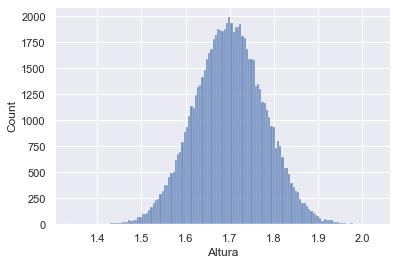

In [13]:
# histograma
sns.histplot(df['Altura'])

In [14]:
# teste
teste, p_value = normaltest(df['Altura'])
p_value

0.9049591541967501

### Critério do valor $p$

> ***Rejeitar $H_0$ se o valor $p\leq 0,05$***

In [15]:
if (p_value <= significancia):
    print('Rejeitar H0, ou seja, o nosso conjunto de dados NÃO segue uma distribuição normal.')
else:
    print('Aceitar H0, ou seja, o nosso conjunto de dados segue uma distribuição normal.')

Aceitar H0, ou seja, o nosso conjunto de dados segue uma distribuição normal.


# Etapas Básicas de um Teste

## Passo 1 - formulação das hipóteses $H_0$ e $H_1$

> - De maneira geral, o alvo do estudo deve ser formulado como a hipótese alternativa $H_1$.
> - A hipótese nula sempre afirma uma igualdade ou propriedade populacional, e $H_1$ a desigualdade que nega $H_0$.
> - No caso da hipótese nula $H_0$ a igualdade pode ser representada por uma igualdade simples "$=$" ou por "$\geq$" e "$\leq$". Sempre complementar ao estabelecido pela hipótese alternativa.
> - A hipótese alternativa $H_1$ deve definir uma desigualdade que pode ser uma diferença simples "$\neq$" ou dos tipos "$>$" e "$<$".




## Passo 2 - escolha da distribuição amostral adequada

> - Quando o tamanho da amostra tiver 30 elementos ou mais, deve-se utilizar a distribuição normal, como estabelecido pelo **teorema do limite central**.
> - Para um tamanho de amostra menor que 30 elementos, e se pudermos afirmar que a população se distribui aproximadamente como uma normal e o **desvio padrão populacional for conhecido**, deve-se utilizar a **distribuição normal**.
> - Para um tamanho de amostra menor que 30 elementos, e se pudermos afirmar que a população se distribui aproximadamente como uma normal e o **desvio padrão populacional for desconhecido**, deve-se utilizar a **distribuição t de Student**.

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>


## Passo 3 - fixação da significância do teste ($\alpha$)

* Define as regiões de aceitação e rejeição das hipóteses (os valores mais freqüentes são 10%, 5% e 1%);

> - O **nível de confiança** ($1 - \alpha$) representa a probabilidade de acerto da estimativa. De forma complementar o **nível de significância** ($\alpha$) expressa a probabilidade de erro da estimativa.
>
> ![Níveis de Confiança e significância](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img001.png)

### Tipos de hipótese $H_1$ 
> - O **nível de confiança** representa o grau de confiabilidade do resultado da estimativa estar dentro de determinado intervalo. Quando fixamos em uma pesquisa um **nível de confiança** de 95%, por exemplo, estamos assumindo que existe uma probabilidade de 95% dos resultados da pesquisa representarem bem a realidade, ou seja, estarem corretos.
>
> ![Áreas de Aceitação e Rejeição](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img002.png)


## Passo 4 - cálculo da estatística-teste

> - Nos testes paramétricos, distância relativa entre a estatística amostral e o valor alegado como provável.
> - Neste passo são obtidas as estatísticas amostrais necessárias à execução do teste (média, desvio-padrão, graus de liberdade etc.)


## Passo 5 - Aceitação ou rejeição da hipótese nula
> - No caso de o intervalo de aceitação conter a estatística-teste, aceita-se $H_0$ como estatisticamente válido e rejeita-se $H_1$ como tal.
> - No caso de o intervalo de aceitação não conter a estatística-teste, rejeita-se $H_0$ e aceita-se $H_1$ como provavelmente verdadeira. 
> - A aceitação também se verifica com a probabilidade de cauda (p-valor): se maior que $\alpha$, aceita-se $H_0$.

# Testes paramétricos

Quando um teste assume determinadas premissas sobre como os parâmetros de uma população se distribuem, estamos trabalhando com **Testes Paramétricos**.

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img013.png' width=100%>

## Teste Bicaudal

O **teste bicaudal** é muito utilizado em **testes de qualidade**, como o apresentado em nosso problema abaixo. Outro exemplo é a avaliação de peças que devem ter um encaixe perfeito (porcas e parafusos, chaves e fechaduras).

![Teste Bicaudal](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img005.png)

### Problema

A empresa **Suco Bom** produz **sucos de frutas em embalagens de 500 ml**. Seu processo de produção é quase todo automatizado e as embalagens de sucos são preenchidas por uma máquina que às vezes apresenta um certo desajuste, levando a erros no preenchimento das embalagens para mais ou menos conteúdo. Quando o volume médio cai abaixo de 500 ml, a empresa se preocupa em perder vendas e ter problemas com os orgãos fiscalizadores. Quando o volume passa de 500 ml, a empresa começa a se preocupar com prejuízos no processo de produção.

O setor de controle de qualidade da empresa **Suco Bom** extrai, periodicamente, **amostras de 50 embalagens** para monitorar o processo de produção. Para cada amostra, é realizado um **teste de hipóteses** para avaliar se o maquinário se desajustou. A equipe de controle de qualidade assume um **nível de significância de 5%**.

Suponha agora que uma **amostra de 50 embalagens** foi selecionada e que a **média amostral observada foi de 503,24 ml**. **Esse valor de média amostral é suficientemente maior que 500 ml para nos fazer rejeitar a hipótese de que a média do processo é de 500 ml ao nível de significância de 5%?**

### Dados do problema

In [3]:
amostra = [509, 505, 495, 510, 496, 509, 497, 502, 503, 505, 
           501, 505, 510, 505, 504, 497, 506, 506, 508, 505, 
           497, 504, 500, 498, 506, 496, 508, 497, 503, 501, 
           503, 506, 499, 498, 509, 507, 503, 499, 509, 495, 
           502, 505, 504, 509, 508, 501, 505, 497, 508, 507]

In [4]:
len(amostra)

50

In [10]:
# Passar para um dataframe: dicionário
df = pd.DataFrame({'amostra': amostra})
df.head()

,amostra
0,509
1,505
2,495
3,510
4,496


In [11]:
# Média da amostra
media_amostra = df['amostra'].mean()
media_amostra

503.24

In [12]:
# Desvio padrão
desvio_amostra = df['amostra'].std()
desvio_amostra

4.483803050527348

In [13]:
# definindo os demais dados do problema
significancia = 0.05
confianca = 1 - significancia
n = 50 # tamanho amostral
mu = 500 # media esperada da população

### Passo 1 - formulação das hipóteses $H_0$ e $H_1$

* Lembre-se, a hipótese nula sempre contém a alegação de igualdade

>* $H_0: \mu = 500$
>* $H_1: \mu \neq 500$

### Passo 2 - escolha da distribuição amostral adequada
<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

O tamanho da amostra é maior que 30?
> Sim, n = 50.

O desvio padrão populacional é conhecido?
> Não.

Distribuição escolhida.
$$\bar{x} \pm z \frac{s}{\sqrt{n}}$$

### Passo 3 - fixação da significância do teste ($\alpha$)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [14]:
from scipy.stats import norm

# Obtendo $z_{\alpha/2}$ 
significancia = 0.05
confianca = 1 - significancia

probabilidade = confianca + significancia / 2

z_alpha_2 = norm.ppf(probabilidade) # atalho para não ter que olhar a tabela!
z_alpha_2

1.959963984540054

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img006.png)

### Passo 4 - cálculo da estatística-teste

$$z = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}$$

In [15]:
x_bar = media_amostra
mu0 = mu
s = desvio_amostra
n = n

z = (x_bar  - mu0) / (s / np.sqrt(n))
z

5.109559775991876

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img007.png)

### Passo 5 - Aceitação ou rejeição da hipótese nula

#### Critério do valor crítico:

> * Teste Bicaudal
> * Rejeitar $H_0$ se $z \leq -z_{\alpha / 2}$ ou se $z \geq z_{\alpha / 2}$

In [26]:
z_alpha_2 <= z or z >= z_alpha_2

True

#### Critério do $p-valor$

> Teste Bicaudal  
> Rejeitar $H_0$ se o valor $p\leq\alpha$

In [28]:
# survival function: 1 - norm.cdf(z)
p = norm.sf(z)*2
p

3.2291031724457304e-07

In [29]:
p <= significancia

True

### Conclusão



> Como a média amostral $\bar{x}$ é significativamente maior que 500 ml, rejeitamos $H_0$. Neste caso, devem ser tomadas providências para ajustar o maquinário que preenche as embalagens.

## Usando `ztest` do `statsmodel`

https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html

In [ ]:
# se necessário:
# !pip3 install statsamodels

In [31]:
from statsmodels.stats.weightstats import ztest

ztest(x1=df['amostra'], value=mu)

(5.109559775991873, 3.229103172445772e-07)

In [32]:
z, p = ztest(x1=df['amostra'], value=mu)
z

5.109559775991873

In [33]:
p

3.229103172445772e-07

## Teste Unicaudal

Os **testes unicaudais** verificam as variáveis em relação a um piso ou a um teto e avaliam os valores máximos ou mínimos esperados para os parâmetros em estudo e a chance de as estatísticas amostrais serem inferiores ou superiores a dado limite.

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img008.png' width='700px'>

### Problema

Um famoso fabricante de refrigerantes alega que uma lata de 350 ml de seu principal produto contém, **no máximo**, **37 gramas de açúcar**. Esta alegação nos leva a entender que a quantidade média de açúcar em uma lata de refrigerante deve ser **igual ou menor que 37 g**.

Um consumidor desconfiado e com conhecimentos em inferência estatística resolve testar a alegação do fabricante e seleciona, aleatóriamente, em um conjunto de estabelecimentos distintos, **uma amostra de 25 latas** do refrigerante em questão. Utilizando o equipamento correto o consumidor obteve as quantidades de açúcar em todas as 25 latas de sua amostra. 

**Assumindo que essa população se distribua aproximadamente como uma normal e considerando um nível de significância de 5%, é possível aceitar como válida a alegação do fabricante?**

### Dados do problema

In [34]:
amostra = [37.27, 36.42, 34.84, 34.60, 37.49, 
           36.53, 35.49, 36.90, 34.52, 37.30, 
           34.99, 36.55, 36.29, 36.06, 37.42, 
           34.47, 36.70, 35.86, 36.80, 36.92, 
           37.04, 36.39, 37.32, 36.64, 35.45]

In [35]:
len(amostra)

25

In [36]:
# Converter para um DataFrame
df = pd.DataFrame({'amostra': amostra})
df.head()

,amostra
0,37.27
1,36.42
2,34.84
3,34.60
4,37.49


In [38]:
# media amostral
media_amostra = df['amostra'].mean()
media_amostra

36.250400000000006

In [39]:
# desvio padrão amostral
desvio_amostra = df['amostra'].std()
desvio_amostra

0.9667535018469453

In [40]:
# número de amostras e número de graus de liberdade
n = 25 # tamanho amostral
graus_de_liberdade = n - 1
u = 37 # valor de referencia

### Passo 1 - formulação das hipóteses $H_0$ e $H_1$

Lembre-se, a hipótese nula sempre contém a alegação de igualdade!

> $H_0: \mu \leq 37$  
> $H_1: \mu > 37$

### Passo 2 - escolha da distribuição amostral adequada
<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

O tamanho da amostra é maior que 30?
> Nâo, n = 25.

Podemos afirmar que a população se distribui aproximadamente como uma normal?
> Sim.

O desvio padrão populacional é conhecido?
> Não.

Distribuição escolhida:
> $$\bar{x} \pm t \frac{s}{\sqrt{n}}$$

### Conhecendo a Distribuição $t$-student
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

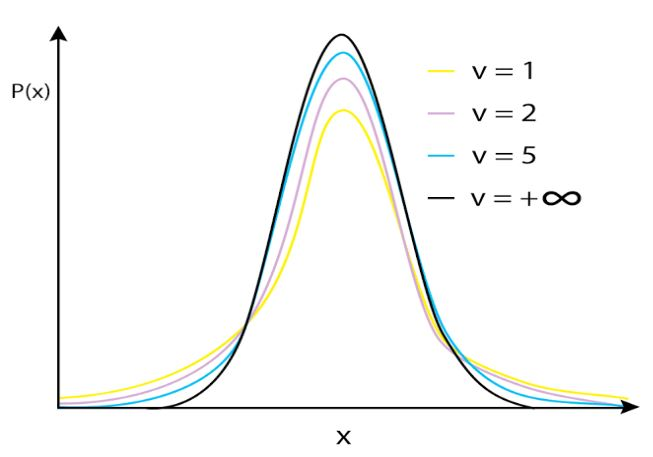

**Propriedades**

- A função densidade da distribuição t de Student tem a mesma forma em sino da distribuição Normal, mas reflete a maior variabilidade (com curvas mais alargadas) que é de se esperar em amostras pequenas.
- Quanto maior o grau de liberdade, mais a distribuição t de Student se aproxima da distribuição Normal.

### Passo 3 - fixação da significância do teste ($\alpha$)

In [42]:
significancia = 0.05
confianca = 1 - significancia

probabilidade = confianca

#### Obtendo $t_{\alpha}$

In [46]:
# t_student PPF
from scipy.stats import t as t_student

t_alpha = t_student.ppf(probabilidade, graus_de_liberdade)
t_alpha

1.7108820799094275

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img009.png)

---

### Passo 4 - cálculo da estatística-teste 

$$t = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}$$

In [47]:
t = (media_amostra - u) / (desvio_amostra / np.sqrt(n))
t

-3.876893119952045

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img010.png)

---

### Passo 5 - Aceitação ou rejeição da hipótese nula

Relembrando...
<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img013.png' width=90%>

#### Critério do valor crítico

> Teste Unicaudal Superior  
> Rejeitar $H_0$ se $t \geq t_{\alpha}$

In [48]:
t >= t_alpha

False

#### Critério do $p$ valor

> Teste Unicaudal Superior  
> Rejeitar $H_0$ se o valor $p\leq\alpha$

In [50]:
# survival function
p = t_student.sf(t, graus_de_liberdade)
p <= significancia

False

### Conclusão 
> Com um nível de confiança de 95% não podemos rejeitar $H_0$, ou seja, a alegação do fabricante é verdadeira.

## Testes para Duas Amostras

### Problema

Em nosso dataset temos os rendimento dos chefes de domicílio obtidos da Pesquisa Nacional por Amostra de Domicílios - PNAD no ano de 2015. Um problema bastante conhecido em nosso país diz respeito a desigualdade de renda, principalmente entre homens e mulheres.

Duas amostras aleatórias, uma de **500 homens** e outra com **500 mulheres**, foram selecionadas em nosso dataset. Com o objetivo de comprovar tal desigualdade, **teste a igualdade das médias** entre estas duas amostras com um nível de **significância de 1%**.

---

É possível também utilizar testes de hipóteses para comparar duas diferentes amostras. Neste tipo de teste se deseja decidir se uma amostra é diferente da outra.

### Seleção das amostras

In [16]:
df = pd.read_csv('../datasets/pnad_2015.csv')
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [34]:
condicao = df['Sexo'] == 0
homens = df[condicao].sample(n=500, random_state=101)

In [35]:
homens.shape

(500, 7)

In [36]:
mulheres = df[df['Sexo']==1].sample(n=500, random_state=101)
mulheres

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
10179,16,1,29,8,12,788,1.697594
43943,33,1,59,8,5,1200,1.742234
75223,53,1,44,2,12,6000,1.710760
33243,31,1,53,8,10,1000,1.611545
5189,14,1,30,8,12,788,1.782686
...,...,...,...,...,...,...,...
7383,15,1,33,8,12,1000,1.679015
70775,51,1,45,8,6,400,1.749150
56737,41,1,54,2,12,2000,1.579044
35947,31,1,31,8,4,200,1.683593


### Obtendo dados do problema

- Média e desvio padrão das mulheres
- Média e desvio padrão dos homens
- Número de amostras (homens e mulheres)
- Nível de significância e confiança

In [64]:
media_amostra_M = mulheres['Renda'].mean()
media_amostra_M

1357.528

In [65]:
media_amostra_H = homens['Renda'].mean()
media_amostra_H

2142.608

In [66]:
desvio_amostra_M = mulheres['Renda'].std()
desvio_amostra_M

1569.9011907484578

In [67]:
desvio_amostra_H = homens['Renda'].std()
desvio_amostra_H

2548.050802499875

In [68]:
NM = 500
NH = 500
significancia = 0.01
confianca = 1 - significancia
D0 = 0

---

### Passo 1 - formulação das hipóteses $H_0$ e $H_1$

Lembre-se, a hipótese nula sempre contém a alegação de igualdade.

$\mu_1 \Rightarrow$ Média das rendas dos chefes de domicílios do sexo masculino  
$\mu_2 \Rightarrow$ Média das rendas dos chefes de domicílios do sexo feminino

$
\begin{cases}
H_0: \mu_1 \leq \mu_2\\
H_1: \mu_1 > \mu_2
\end{cases}
$

ou

$
\begin{cases}
H_0: \mu_1 -\mu_2 \leq 0\\
H_1: \mu_1 -\mu_2 > 0
\end{cases}
$

---

### Passo 2 - escolha da distribuição amostral adequada
> Em testes que envolvam duas amostras com o emprego da tabela $t$ de Student, o número de graus de liberdade será sempre igual a $n_1 + n_2 - 2$

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>


O tamanho da amostra é maior que 30?
> Sim, n = NH + NM = 1000

O desvio padrão populacional é conhecido?
> Não.

Distribuição escolhida.
> 

### Passo 3 - fixação da significância do teste ($\alpha$)

In [69]:
significancia = 0.01
confianca = 1 - significancia

probabilidade = confianca

# na tabela
z_alpha = 2.33

# usando a funçã
z_alpha = norm.ppf(probabilidade)
z_alpha

2.3263478740408408

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img011.png)

---

### Passo 4 - cálculo da estatística-teste 
$$z = \frac{(\bar{x_1} - \bar{x_2})-D_0}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$$

In [70]:
z_alpha = z_alpha

In [71]:
z = ((media_amostra_H - media_amostra_M) - D0) / np.sqrt(desvio_amostra_H**2/NH + desvio_amostra_M**2/NM)
z

5.86562005776475

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img012.png)

---

### Passo 5 - Aceitação ou rejeição da hipótese nula

Relembrando ...
<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img014.png' width=90%>

#### Critério do valor crítico

> Teste Unicaudal
> Rejeitar $H_0$ se $z \geq z_{\alpha}$

In [72]:
z >= z_alpha

True

#### Critério do valor $p$

> Teste Unicaudal
> Rejeitar $H_0$ se o valor $p\leq\alpha$

In [73]:
p = norm.sf(z)
p <= significancia

True

In [77]:
p

2.2372867859458743e-09

### Conclusão


Com um nível de confiança de 99% rejeitamos $H_0$, isto é, concluímos que a média das rendas dos chefes de domicílios do sexo masculino é maior que a média das rendas das chefes de domicílios do sexo feminino. Confirmando a alegação de desigualdade de renda entre os sexos.

## Usando o `ttest_ind` do `statsmodels`

In [76]:
from statsmodels.stats.weightstats import ttest_ind

x1 = homens['Renda']
x2 = mulheres['Renda']

ttest_ind(x1, x2, alternative='larger')


(5.865620057764754, 3.0401040094337073e-09, 998.0)

# TESTES NÃO PARAMÉTRICOS

O trabalho com pequenas amostras pode levar a não aceitação da validade do teorema central do limite e também na impossibilidade de fazer suposições sobre a distribuição da variável avaliada. Quando isso ocorre torna-se necessária a aplicação de testes não paramétricos. Nos testes não paramétricos, não fazemos hipóteses sobre a distribuição (de probabilidade) das quais as observações são extraídas.

## Teste do Qui-Quadrado ( $\chi^2$)

Também conhecido como teste de adequação ao ajustamento, seu nome se deve ao fato de utilizar uma variável estatística padronizada, representada pela letra grega qui ( $\chi$) elevada ao quadrado. A tabela com os valores padronizados e como obtê-la podem ser vistos logo abaixo.

O teste do $\chi^2$ testa a hipótese nula de não haver diferença entre as frequências observadas de um determinado evento e as frequências que são realmente esperadas para este evento.

Os passos de aplicação do teste são bem parecidos aos vistos para os testes paramétricos.

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img017.png)

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img016.png' width='250px'>

Tabela com os valores de $\chi_p^2$ em função dos graus de liberdade $(n - 1)$ e de $p = P(\chi^2 \leq \chi_p^2)$

### Problema

Antes de cada partida do campeonato nacional de futebol, as moedas utilizadas pelos árbitros devem ser verificadas para se ter certeza de que não são viciadas, ou seja, que não tendam para determinado resultado. Para isso um teste simples deve ser realizado antes de cada partida. Este teste consiste em lançar a moeda do jogo **50 vezes** e contar as frequências de **CARAS** e **COROAS** obtidas. A tabela abaixo mostra o resultado obtido no experimento:

||CARA|COROA|
|-|-|-|
|Observado|17|33|
|Esperado|25|25|

A um **nível de significância de 5%**, é possível afirmar que a moeda não é honesta, isto é, que a moeda apresenta uma probabilidade maior de cair com a face **CARA** voltada para cima?

### Dados do problema

In [48]:
F_observada = [17, 33]
F_esperada = [25, 25]

significancia = 0.05
confianca = 1 - significancia

k = 2 # Número de eventos possíveis
graus_de_liberdade = k - 1

### Passo 1 - formulação das hipóteses $H_0$ e $H_1$

Lembre-se, a hipótese nula sempre contém a alegação de igualdade!

> $H_0: F_{CARA} = F_{COROA}$  
> $H_1: F_{CARA} \neq F_{COROA}$

### Passo 2 - fixação da significância do teste ($\alpha$)

In [49]:
significancia = 0.05
confianca = 1 - significancia

probabilidade = confianca

### Passo - 3 Obtendo $\chi_{p}^2$

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi.html

In [50]:
from scipy.stats import chi, chi2

In [52]:
# chi2;.ppf
chi_p2 = chi2.ppf(probabilidade, graus_de_liberdade) # chi2 é para uma distribuição não paramétrica similar ao `norm` da dist. param.
chi_p2

3.841458820694124

In [53]:
norm.ppf(probabilidade) # para fins de comparação

1.6448536269514722

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img018.png)

---

### Passo 4 - cálculo da estatística-teste 

$$\chi^2 = \sum_{i=1}^{k}{\frac{(F_{i}^{Obs} - F_{i}^{Esp})^2}{F_{i}^{Esp}}}$$

Onde

$F_{i}^{Obs}$ = frequência observada para o evento $i$

$F_{i}^{Esp}$ = frequência esperada para o evento $i$

$k$ = total de eventos possíveis

In [54]:
chi_2 = 0

for i in range(len(F_esperada)):
    chi_2 = chi_2 + (F_observada[i] - F_esperada[i])**2/F_esperada[i]
    
chi_2

5.12

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img019.png)

---

### Passo 5 - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img020.png' width=80%>

#### Critério do valor crítico

> Rejeitar $H_0$ se $\chi_{teste}^2 > \chi_{\alpha}^2$

In [55]:
chi_2 > chi_p2

True

#### Critério do valor $p$

> Rejeitar $H_0$ se o valor $p\leq\alpha$

### Conclusão 

> Com um nível de confiança de 95% rejeitamos a hipótese nula ($H_0$) e concluímos que as frequências observadas e esperadas são discrepantes, ou seja, a moeda não é honesta e precisa ser substituída.

## Usando `chisquare` do `stats`

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html

In [56]:
from scipy.stats import chisquare

In [57]:
chisquare(F_observada, F_esperada)

Power_divergenceResult(statistic=5.12, pvalue=0.023651616655356)

---